In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Credit Status Dataset

## All features in a list:
### Categorical
* <span style="color:red">ID</span>
* <span style="color:red">Customer_ID</span>
* Month
* <span style="color:red">Name</span>
* <span style="color:red">SSN</span>
* Occupation
* Type of Loan
* Credit_mix
* Payment behaviour
* Credit history age
* Payment_of_min_amount

### Discrete
* Age
* Num_Bank_Accounts
* Interest Rate
* Num of Loan
* Delay_from_due_date
* Num_of_delayed_payment

### Continous
* Annual_Income
* Monthly_Inhand Salary
* Monthly_Balance

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/mau-JS/OracleML/main/credit-status-dataset.csv')
df.head()

#For consistency and relevance, we convert years and months to continous values. Our years will be kept as discrete values and months as decimals.
def convert_to_years(s):
    years, months = 0, 0
    if isinstance(s, str):
        parts = s.split('and')
        if 'Year' in parts[0]:
            years = int(parts[0].split(' Year')[0])
        if len(parts) > 1 and 'Month' in parts[1]:
            months = int(parts[1].split(' Month')[0])
    return years + months / 12.0

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_years)


In [57]:
df = df.drop(['ID','Customer_ID','Name','SSN'],axis=1)
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance
0,September,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,Good,22.750000,No,Low_spent_Small_value_payments,186.2667021
1,October,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,Good,22.833333,No,High_spent_Medium_value_payments,361.4440039
2,November,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,Good,0.000000,No,Low_spent_Medium_value_payments,264.6754462
3,December,24_,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,Good,23.000000,No,High_spent_Medium_value_payments,343.8268732
4,September,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,Good,27.250000,No,High_spent_Large_value_payments,485.2984337


Month has 0 missing values
Age has 0 missing values
Occupation has 0 missing values
Annual_Income has 0 missing values
Monthly_Inhand_Salary has 7498 missing values
Num_Bank_Accounts has 0 missing values
Num_Credit_Card has 0 missing values
Interest_Rate has 0 missing values
Num_of_Loan has 0 missing values
Type_of_Loan has 5704 missing values
Delay_from_due_date has 0 missing values
Num_of_Delayed_Payment has 3498 missing values
Credit_Mix has 0 missing values
Credit_History_Age has 0 missing values
Payment_of_Min_Amount has 0 missing values
Payment_Behaviour has 0 missing values
Monthly_Balance has 562 missing values


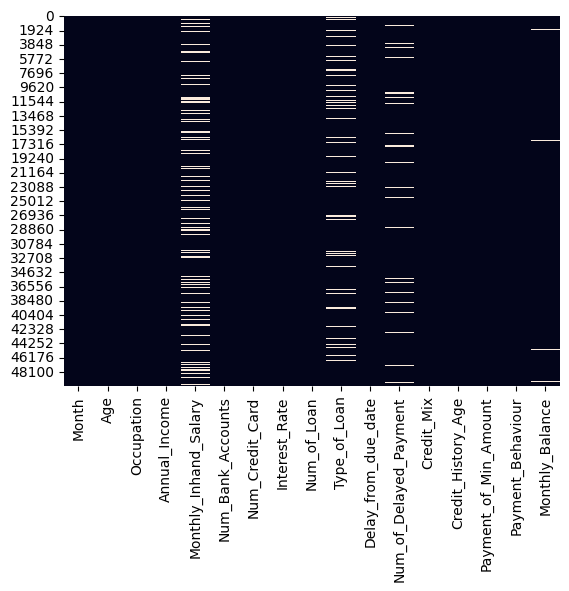

In [59]:
#Visualizing missing data
sns.heatmap(df.isnull(), cbar=False)

# Checks missing values for all attributes
for i in df.columns:
  missing_values = df[i].isna()
  print(f'{i} has {missing_values.sum()} missing values')

In [58]:
correlation_matrix = df.corr()

ValueError: could not convert string to float: 'September'

In [ ]:
# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

NameError: name 'correlation_matrix' is not defined

<Figure size 1000x800 with 0 Axes>

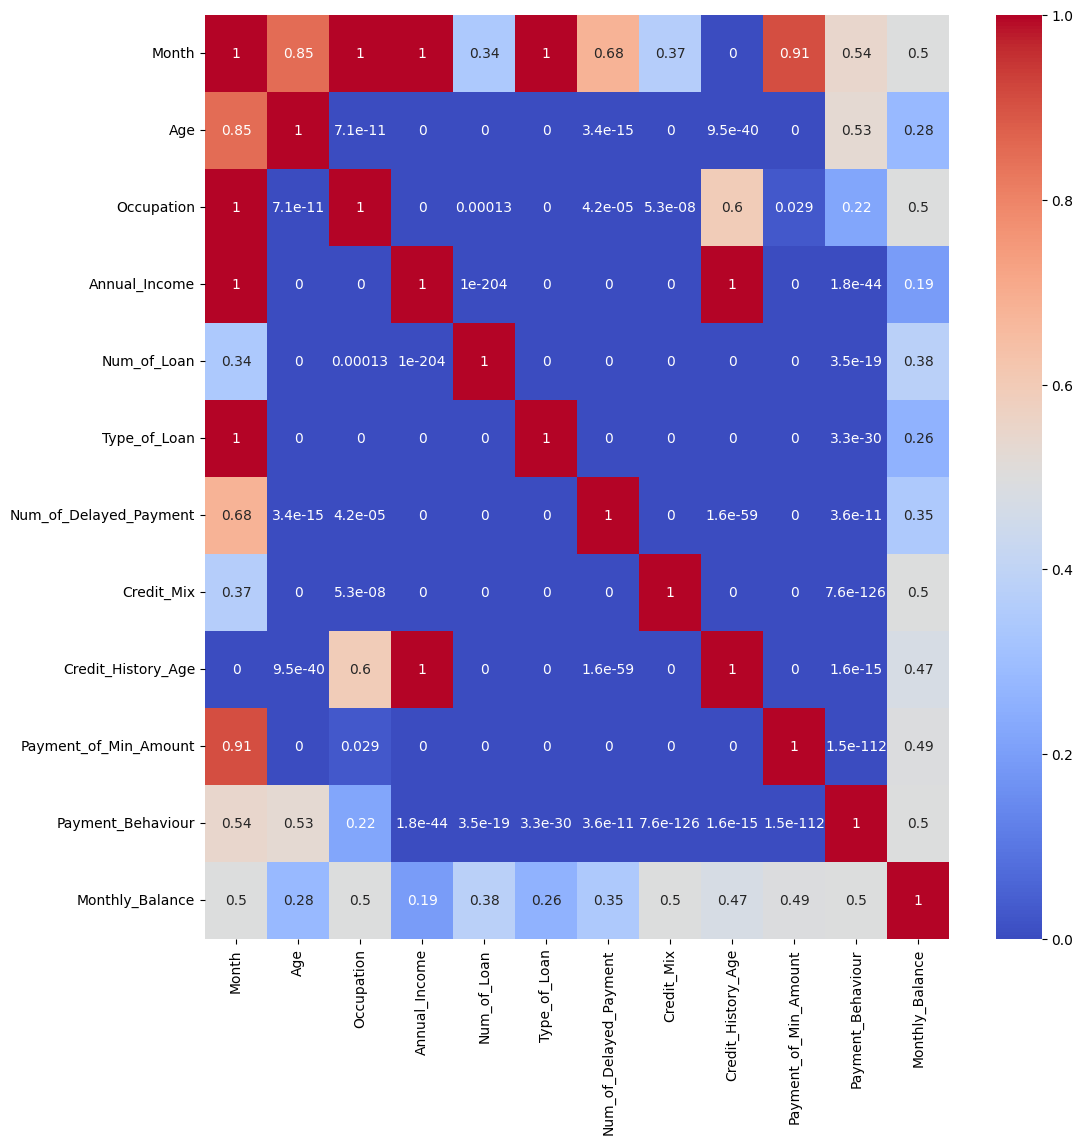

In [ ]:
# List of categorical columns to exclude
exclude_cols = ['ID', 'Customer_ID', 'Name', 'SSN']

# Get a list of all categorical columns in df
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove the excluded columns from your list
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

# Initialize a DataFrame to store the p-values
p_values = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Loop over each pair of categorical columns and perform Chi-Square test
for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        contingency_table = pd.crosstab(df[categorical_cols[i]], df[categorical_cols[j]])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        # Store the p-value in the DataFrame
        p_values.loc[categorical_cols[i], categorical_cols[j]] = p

# Since the matrix is symmetric, copy the upper triangle values to the lower triangle
p_values = p_values.combine_first(p_values.T)

# Replace NaN values with 1 (since p-value for a variable with itself is 1)
p_values.fillna(1, inplace=True)
plt.figure(figsize=(12, 12))
# Plot the heatmap using seaborn
sns.heatmap(p_values.astype(float), cmap='coolwarm', annot=True)
plt.show()

#### Considering our chi square test, we can determine what values we can remove given their p values. We check whether

In [ ]:
#Function that determines whether a client receives a credit or not.
#Example of function that determines credit worthiness
#def determine_creditworthiness(client):
    # Define your conditions for credit approval
#    if (client['Annual_Income'] > 50000) and (client['Credit_History_Age'] > '5 Years') and (client['Num_of_Delayed_Payment'] < 3):
#        return 'Approved'
#    else:
#        return 'Not Approved'